In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Different_stores_dataset (1).csv")
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


#  1. Check missing values and duplicate records

In [5]:
print(df.isnull().sum())

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64


In [7]:
df.duplicated().sum()
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


# 2. Add column name 'Total Sales'

In [9]:
df["Total Sales"] = df["quantity"] * df["selling_price_per_unit"]  
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40


# How many customers have age more than 60?

In [11]:
print(df["age"].value_counts()[60])

1874


# 4.How many unique customer_id entries are there? Do any customers make multiple purchases?

In [13]:
df.customer_id.unique()

array(['C241288', 'C111565', 'C266599', ..., 'C103292', 'C800631',
       'C273973'], dtype=object)

In [15]:
df.customer_id.nunique()

99457

In [17]:
purchase_counts = df["customer_id"].value_counts()
multiple_purchases = purchase_counts[purchase_counts > 1]

print(multiple_purchases)

Series([], Name: count, dtype: int64)


# 5.Are there more male or female customers, Show in Pie Chart?

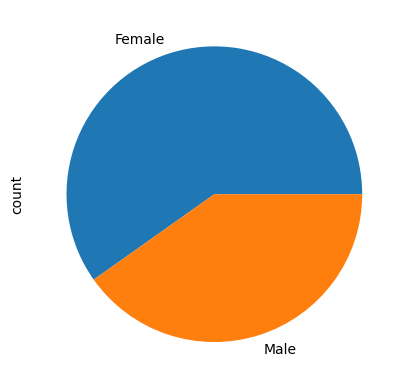

In [19]:
df.gender.value_counts().plot(kind='pie')
plt.show()

# 6.Which category is least popular among customers?

In [21]:
least_revenue_category = df.groupby("category")["Total Sales"].sum().idxmin()
print(least_revenue_category)


Souvenir


# 7.Which category has the highest sales volume?

In [23]:
Highest_revenue_category = df.groupby("category")["Total Sales"].sum().idxmax()
print(Highest_revenue_category)


Clothing


# 8. Add column name 'Total Profit'

In [25]:
df["Total Profit"] = df["Total Sales"] - df["cost_price_per_unit"]  
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00,6076.620
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53,3781.071
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08,5.020
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25,12103.485
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40,196.950


# 9. Display the top 10 invoices with the highest quantities sold?

In [29]:
top_invoices = df.sort_values(by="invoice_no", ascending=False).head(10)
print(top_invoices)

      invoice_no      invoice_date customer_id  gender  age         category  \
62967    I999994   11/9/2016 14:50     C299697  Female   21       Technology   
46474    I999973   11/6/2016 22:42     C248542    Male   28       Technology   
21067    I999972   11/2/2016 19:53     C195931    Male   63       Technology   
37020    I999959    11/5/2016 9:56     C695980  Female   68         Clothing   
39275    I999956   11/5/2016 18:42     C925896    Male   69             Toys   
53679    I999952    11/8/2016 2:43     C265085    Male   54  Food & Beverage   
70806    I999948  11/10/2016 21:19     C161331    Male   33  Food & Beverage   
47496    I999922    11/7/2016 2:40     C120008  Female   21            Shoes   
63889    I999868   11/9/2016 18:25     C309718  Female   60            Shoes   
97692    I999852   11/15/2016 5:52     C180131    Male   38         Souvenir   

       quantity  selling_price_per_unit  cost_price_per_unit payment_method  \
62967         3                 3150.00 

# 10.Which payment method is most commonly used?

In [31]:
most_common_payment = df["payment_method"].value_counts()
most_common_payment

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

# 11.Total Sales with respect to region?

In [33]:
sales_by_region = df.groupby("region")["Total Sales"].sum().reset_index()
sales_by_region

,region,Total Sales
0,Central,58803471.74
1,East,72280660.57
2,South,40655491.64
3,West,79825624.03


# 12.Sort Malls with average sales higher to lower?

In [71]:
avg_sales_by_mall = df.groupby("shopping_mall")["Total Sales"].mean().reset_index()
avg_sales_by_mall = avg_sales_by_mall.sort_values(by="Total Sales", ascending=False)
avg_sales_by_mall

,shopping_mall,Total Sales
6,Zorlu Center,2573.248351
1,Kanyon,2550.618396
2,Mall of Istanbul,2543.276766
5,Viaport Outlet,2523.835118
0,Istinye Park,2523.186677
4,Metropol AVM,2497.777108
3,Metrocity,2485.030133


# 13.Sort categories with the highest profit margins display in bar plot?

In [51]:
df["Profit Margin"] = df["Total Sales"] / df["Total Profit"]*100  
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit,Profit Margin
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00,6076.620,123.456790
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53,3781.071,142.857143
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08,5.020,5977.689243
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25,12103.485,123.966362
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40,196.950,123.076923


<Axes: xlabel='Profit Margin'>

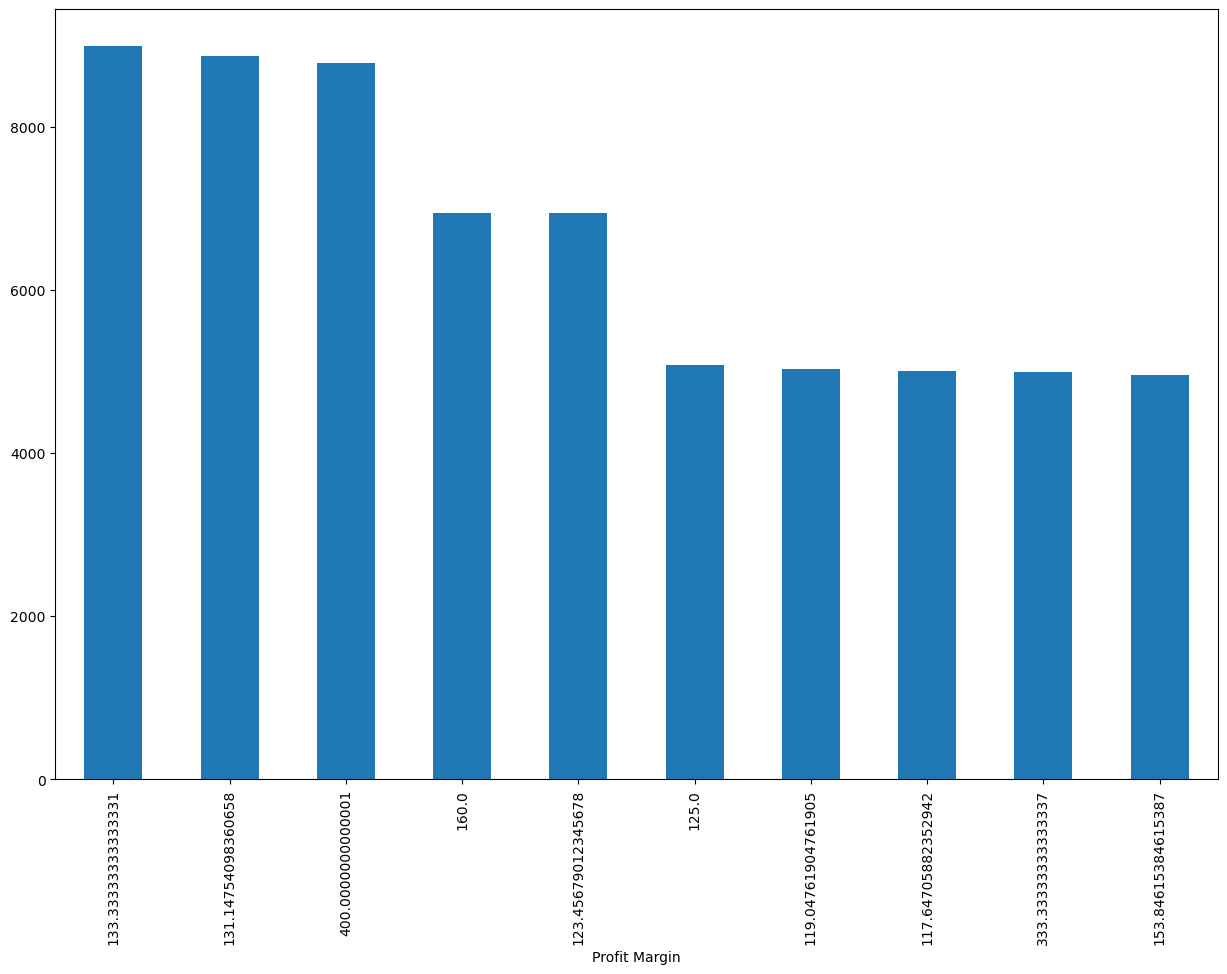

In [53]:
df["Profit Margin"].value_counts().nlargest(10).plot(kind ='bar',figsize=(15,10))

# 14. What is the total number of transactions per region for each payment method?

In [58]:
transactions_by_region_payment = df.groupby(["region", "payment_method"]).size().reset_index(name="Total Transactions")

In [60]:
transactions_by_region_payment

,region,payment_method,Total Transactions
0,Central,Cash,10319
1,Central,Credit Card,8140
2,Central,Debit Card,4640
3,East,Cash,12738
4,East,Credit Card,9817
5,East,Debit Card,5751
6,South,Cash,7227
7,South,Credit Card,5698
8,South,Debit Card,3284
9,West,Cash,14163


# 15. How do sales in different categories compare between males and females?

In [67]:
sales_by_category_gender = df.groupby(["category", "gender"])["Total Sales"].sum().reset_index()
pivot_table = sales_by_category_gender.pivot(index="category", columns="gender", values="Total Sales").fillna(0)
pivot_table

gender,Female,Male
category,,
Books,489420.75,345238.20
Clothing,68260097.84,45754397.92
Cosmetics,4068073.66,2728611.28
Food & Beverage,505322.60,344233.37
Shoes,39425167.30,27128284.17
Souvenir,382867.20,252957.45
Technology,34669950.00,23230200.00
Toys,2416046.08,1564380.16
